In [1]:
import pandas as pd
import matplotlib.pylab as plt 
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy import stats



def load_data(filepath):
    '''takes in the file path where the data is store and returns a pandas dataframe.
    filepath must be entered as a string
    '''
    
    df = pd.read_csv(filepath)
    return df;

filepath = '../data/portfolio2_ETL.csv'
portfolio2 = load_data(filepath)

portfolio2 = portfolio2.drop(columns=['id'])
portfolio2.head()

,idade_empresa_anos,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_rm,fl_spa,fl_antt,fl_veiculo,...,nm_divisao_ATIVIDADES DE APOIO A EXTRACAO DE MINERAIS,nm_divisao_DESCONTAMINACAO E OUTROS SERVICOS DE GESTAO DE RESIDUOS,nm_divisao_EXTRACAO DE PETROLEO E GAS NATURAL,nm_divisao_FABRICACAO DE PRODUTOS FARMOQUIMICOS E FARMACEUTICOS,"de_faixa_faturamento_estimado_ATE R$ 81.000,00","de_faixa_faturamento_estimado_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS",de_saude_rescencia_ATE 3 MESES,nm_divisao_EXTRACAO DE CARVAO MINERAL,de_saude_rescencia_ATE 6 MESES,nm_divisao_FABRICACAO DE PRODUTOS DO FUMO
0,11.24,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,43.79,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16.39,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39.67,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20.27,0,0,0,0,0,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
#To fixate the results between attempts we'll set the random state to 42
random_state = 42

pca = PCA(n_components = None, random_state = random_state)
pca_p1 = pca.fit_transform(portfolio2)
pca.explained_variance_ratio_

array([4.32017466e-01, 2.07062042e-01, 1.77048514e-01, 1.15865249e-01,
       5.90457039e-02, 1.15580835e-03, 9.74195648e-04, 7.29295576e-04,
       6.19691307e-04, 5.16341453e-04, 4.05931856e-04, 3.71032378e-04,
       3.57135237e-04, 3.43988523e-04, 3.28336519e-04, 3.22526551e-04,
       2.52077693e-04, 2.04671390e-04, 1.95593637e-04, 1.49137989e-04,
       1.38927027e-04, 1.09604819e-04, 1.05940366e-04, 9.85283873e-05,
       9.05229848e-05, 8.48337971e-05, 8.28231416e-05, 7.52427544e-05,
       7.14192334e-05, 6.94374168e-05, 6.80462349e-05, 5.51997998e-05,
       5.42221779e-05, 4.85984184e-05, 4.55580997e-05, 4.42304749e-05,
       4.26174977e-05, 4.16816716e-05, 3.64051400e-05, 3.49155626e-05,
       3.32767423e-05, 3.16621990e-05, 3.08493684e-05, 2.87809915e-05,
       2.71031223e-05, 2.67619837e-05, 2.56989803e-05, 2.49374195e-05,
       2.33416896e-05, 2.16849287e-05, 2.04664421e-05, 1.72685990e-05,
       1.57138973e-05, 1.44186502e-05, 1.37425923e-05, 1.35107643e-05,
      

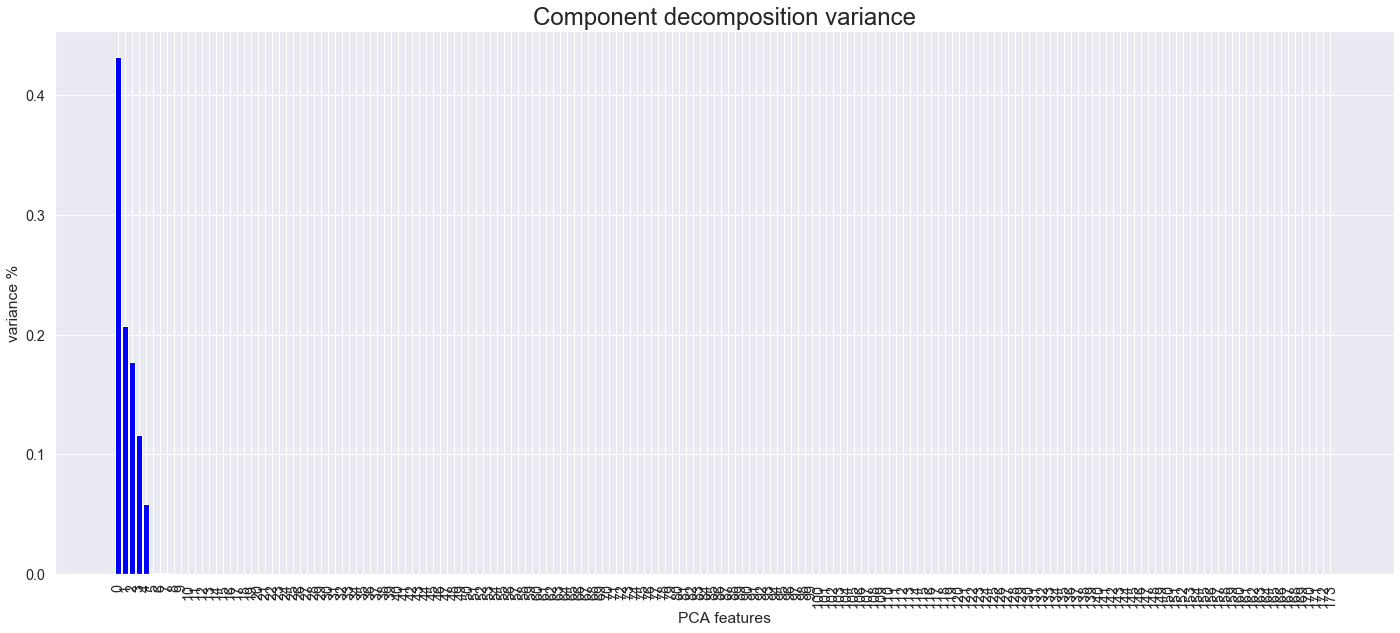

In [3]:
sns.set(font_scale = 1.3)
features = range(pca.n_components_)
plt.figure(figsize=(24,10))
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.title("Component decomposition variance", fontsize=24)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(rotation=90)
plt.xticks(features)
plt.show()

In [4]:
#Just so we can fix a point between attempts we'll work with every compononet that is higher that 2.5%
components_limit = 0.025
components = pca.explained_variance_ratio_[pca.explained_variance_ratio_ > components_limit]
number_components = len(components)

pca = PCA(n_components = number_components, random_state = random_state) 
X = pca.fit_transform(portfolio2)
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([0.43201747, 0.20706204, 0.17704851, 0.11586525, 0.0590457 ]),
 0.9910389756502119)

In [5]:
pca = PCA(n_components = number_components, random_state = random_state)
pca_p1 = pca.fit_transform(portfolio2)
inverse_transform_p1 = pca.inverse_transform(pca_p1)

print("portfolio2 shape",portfolio2.shape)
print("pca_p1 shape",pca_p1.shape)
print("inverse_transform_p1 shape",inverse_transform_p1.shape)

portfolio2 shape (566, 174)
pca_p1 shape (566, 5)
inverse_transform_p1 shape (566, 174)


In [6]:
MSE_score = ((portfolio2-inverse_transform_p1)**2).sum(axis=1)

MSE_score.head()

0     5.022946
1     3.137096
2     4.625540
3     6.122213
4    13.512929
dtype: float64

In [7]:
MSE_score.sort_values(ascending=False)

545    37.579257
499    35.490255
72     26.737516
489    24.598761
93     22.219768
         ...    
473     2.894404
424     2.773105
133     2.709786
25      2.286792
216     1.081553
Length: 566, dtype: float64

In [8]:
MSE_score.mean()

6.320415782810293

In [9]:
MSE_max_scores = MSE_score.nlargest(9).index

portfolio2.iloc[MSE_max_scores]

,idade_empresa_anos,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_rm,fl_spa,fl_antt,fl_veiculo,...,nm_divisao_ATIVIDADES DE APOIO A EXTRACAO DE MINERAIS,nm_divisao_DESCONTAMINACAO E OUTROS SERVICOS DE GESTAO DE RESIDUOS,nm_divisao_EXTRACAO DE PETROLEO E GAS NATURAL,nm_divisao_FABRICACAO DE PRODUTOS FARMOQUIMICOS E FARMACEUTICOS,"de_faixa_faturamento_estimado_ATE R$ 81.000,00","de_faixa_faturamento_estimado_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS",de_saude_rescencia_ATE 3 MESES,nm_divisao_EXTRACAO DE CARVAO MINERAL,de_saude_rescencia_ATE 6 MESES,nm_divisao_FABRICACAO DE PRODUTOS DO FUMO
545,26.65,0,0,0,0,0,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,19.36,0,0,0,0,0,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,15.75,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489,15.84,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,11.79,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,30.39,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
466,33.36,0,0,0,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277,23.08,0,0,0,0,0,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
215,45.74,0,1,0,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#Interquartile Range Method
q25, q75 = np.percentile(MSE_score, 25), np.percentile(MSE_score, 75)
iqr = q75 - q25

print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=4.625, 75th=6.775, IQR=2.150


In [11]:
cut_off = iqr * 1.5
upper = q75 + cut_off#/2#accounting for the lack of lower bracket
upper, cut_off

(10.000272899803127, 3.2250671542430083)

In [12]:
outliers = [x for x in MSE_score if x > upper]
print('Identified outliers: %d' % len(outliers))
len(MSE_score)

Identified outliers: 41


566

In [13]:
outliers_removed = [x for x in  MSE_score if x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 525


In [14]:
MSE_array = np.array(MSE_score)

indices = [np.where(MSE_array==x)[0][0] for x in outliers_removed]
no_outliers_p1 = portfolio2.iloc[indices]
no_outliers_p1.shape

(525, 174)

In [15]:
def load_data(df,filepath):
    '''
    Input
    pandas dataframe and the filepath to save the dataframe
    Output
    File with the pandas dataframe
    '''
    df.to_csv(filepath, index = False)
    
filepath_save = '../data/portfolio2_no_outliers.csv'
load_data(no_outliers_p1,filepath_save)